In [1]:
from bs4 import BeautifulSoup
import requests
import re

In [2]:
url="https://www.thehindu.com/latest-news/"
page=requests.get(url)

s1=BeautifulSoup(page.content,"html")
s2=BeautifulSoup(s1.prettify(),"html")

In [3]:
s2

<!DOCTYPE html>

<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>
   Latest News - The Hindu
  </title>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<meta content="Latest News" name="title"/>
<meta content="Read the Latest News On Business, Politics, Sports, Entertainment &amp;amp; Much More From India And Around The World At The Hindu" name="description"/>
<meta content="index, follow" name="robots"/>
<meta content="max-image-preview:large" name="robots">
<meta content="sectionpage" name="atdlayout"/>
<meta content="Latest News" name="twitter:title">
<meta content="Read the Latest News On Business, Politics, Sports, Entertainment &amp;amp; Much More From India And Around The World At The Hindu" name="twitter:description">
<meta content="https://www.thehindu.com/theme/images/th-online/OG-sections.png" name="twitter:image">
<meta content="Latest News" 

In [4]:
headline=s2.find_all("h3")
headline

[<h3 class="title">
 <a href="https://www.thehindu.com/sport/olympics/paris-olympics-2024-day-4-live-updates/article68462952.ece">
               Paris Olympics day 4 LIVE updates: Men’s triathlon postponed over Seine river’s water quality concerns
              </a>
 </h3>,
 <h3 class="title">
 <a href="https://www.thehindu.com/hindi/editorial/human-failure-hindi-editorial-on-ias-aspirants-and-the-accident-in-delhi/article68463037.ece">
               इंसानी नाकामीः आईएएस के पदाभिलाषी और दिल्ली में हादसा
              </a>
 </h3>,
 <h3 class="title">
 <a href="https://www.thehindu.com/news/cities/Mangalore/video-landslip-near-sakleshpur-cuts-off-road-that-served-as-an-alternative-to-bengaluru-mangaluru-highway/article68463024.ece">
               Landslip near Sakleshpur cuts off road that served as an alternative to Bengaluru-Mangaluru highway
              </a>
 </h3>,
 <h3 class="title">
 <a href="https://www.thehindu.com/sci-tech/technology/crypto-stocks-jump-in-the-us-after-donal

In [5]:
major_headlines=[i.text.strip() for i in headline]
major_headlines

['Paris Olympics day 4 LIVE updates: Men’s triathlon postponed over Seine river’s water quality concerns',
 'इंसानी नाकामीः आईएएस के पदाभिलाषी और दिल्ली में हादसा',
 'Landslip near Sakleshpur cuts off road that served as an alternative to Bengaluru-Mangaluru highway',
 "Crypto stocks jump in the U.S. after Donald Trump's pro-Bitcoin speech",
 'Howrah-Mumbai train derailment LIVE: Two killed, 20 injured as 18 coaches derail in Jharkhand',
 'Google Pixel 9 Pro will launch on August 13 in U.S.; India to get new Pixel Fold a day later',
 'Parliament Session LIVE updates: Proceedings to begin in both Houses at 11 a.m.',
 'Bengaluru needs a second airport, but with good planning',
 '‘STEMinism is an attempt to bring more women into science without critiquing the field of science’',
 'Know your English | What does the expression ‘cap in hand’ mean?',
 "At 16, Jiya becomes world's youngest and fastest para swimmer to cross English Channel",
 'Counselling for NEET-UG to start from August 14',
 

In [6]:
import nltk 
from nltk.corpus import stopwords

In [7]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(list(stop_words))

['them', 'he', 'shan', 'or', 'below', 'but', 'ourselves', 'other', 'both', 's', 'yourself', 'an', 'his', 'here', 'being', 'these', 'as', 'hasn', "doesn't", 'it', 'off', 'where', 'some', 'yourselves', 'more', 'most', 'mightn', 'up', 'itself', 'my', "shan't", 'once', "that'll", 'so', "couldn't", 'don', "didn't", 'do', 'why', 'under', 'm', 'own', 'down', "shouldn't", 'who', 'ain', 'didn', 'through', 'myself', "wouldn't", 'weren', 'than', 'on', 'of', 'haven', 'there', 'hers', 'and', 'me', 'if', 'over', 'such', 'hadn', 'herself', 'does', 'only', 'himself', "mustn't", "you've", 'by', 'again', 'from', 'shouldn', 'your', 'i', 'mustn', 'did', 'theirs', "you'll", 'ours', 'this', 'can', 'll', 'until', 'further', 'o', "don't", 'after', 'were', 'with', 'd', "should've", 'each', 'too', "hasn't", 'out', 'before', 'for', 'now', "weren't", 'to', 'will', 't', "haven't", "isn't", 'a', 've', "it's", 'is', 'has', "aren't", 'how', 'at', 'was', "she's", 'those', 'y', "hadn't", "mightn't", 'nor', 'then', 'its

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ittismita/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# cleaning headlines
def cleaned(text):
    text=text.lower()
    #text=re.sub(r'\s+','',text)#remove extra spaces
    text=re.sub(r'[^\w\s]','',text)#remove punctuations
    return text.strip()


cleaned_headlines= [cleaned(i) for i in major_headlines]
cleaned_headlines
    
    

['paris olympics day 4 live updates mens triathlon postponed over seine rivers water quality concerns',
 'इसन नकम आईएएस क पदभलष और दलल म हदस',
 'landslip near sakleshpur cuts off road that served as an alternative to bengalurumangaluru highway',
 'crypto stocks jump in the us after donald trumps probitcoin speech',
 'howrahmumbai train derailment live two killed 20 injured as 18 coaches derail in jharkhand',
 'google pixel 9 pro will launch on august 13 in us india to get new pixel fold a day later',
 'parliament session live updates proceedings to begin in both houses at 11 am',
 'bengaluru needs a second airport but with good planning',
 'steminism is an attempt to bring more women into science without critiquing the field of science',
 'know your english  what does the expression cap in hand mean',
 'at 16 jiya becomes worlds youngest and fastest para swimmer to cross english channel',
 'counselling for neetug to start from august 14',
 'two killed 20 injured as 18 coaches of mumbai

In [9]:
# removing stopwords
def cleaned_nltk(text):
    sent=[]
    words=text.split()
    for x in words:
        
        if x not in stop_words:
            sent.append(x)
    return ' '.join(sent)

cleaned_headline= [cleaned_nltk(i) for i in cleaned_headlines]
cleaned_headline

['paris olympics day 4 live updates mens triathlon postponed seine rivers water quality concerns',
 'इसन नकम आईएएस क पदभलष और दलल म हदस',
 'landslip near sakleshpur cuts road served alternative bengalurumangaluru highway',
 'crypto stocks jump us donald trumps probitcoin speech',
 'howrahmumbai train derailment live two killed 20 injured 18 coaches derail jharkhand',
 'google pixel 9 pro launch august 13 us india get new pixel fold day later',
 'parliament session live updates proceedings begin houses 11',
 'bengaluru needs second airport good planning',
 'steminism attempt bring women science without critiquing field science',
 'know english expression cap hand mean',
 '16 jiya becomes worlds youngest fastest para swimmer cross english channel',
 'counselling neetug start august 14',
 'two killed 20 injured 18 coaches mumbaihowrah mail derail jharkhand',
 'wayanad landslides live updates death toll rises 12 rahul gandhi pm modi call cm vijayan offer support',
 'driving 130 kmph result

In [10]:
import pandas as pd
df=pd.DataFrame(cleaned_headlines,columns=["headlines"])
df


,headlines
0,paris olympics day 4 live updates mens triathl...
1,इसन नकम आईएएस क पदभलष और दलल म हदस
2,landslip near sakleshpur cuts off road that se...
3,crypto stocks jump in the us after donald trum...
4,howrahmumbai train derailment live two killed ...
...,...
194,cbi has lost its independence in probing thoot...
195,wild elephant electrocuted in rubber plantatio...
196,ramgarh dams catchment area being surveyed for...
197,kpcc slams ldf for not collecting turnover tax...


In [11]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    return sia.polarity_scores(text)

df['Sentiment'] = df['headlines'].apply(analyze_sentiment)
df


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ittismita/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,headlines,Sentiment
0,paris olympics day 4 live updates mens triathl...,"{'neg': 0.122, 'neu': 0.878, 'pos': 0.0, 'comp..."
1,इसन नकम आईएएस क पदभलष और दलल म हदस,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,landslip near sakleshpur cuts off road that se...,"{'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'comp..."
3,crypto stocks jump in the us after donald trum...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,howrahmumbai train derailment live two killed ...,"{'neg': 0.461, 'neu': 0.539, 'pos': 0.0, 'comp..."
...,...,...
194,cbi has lost its independence in probing thoot...,"{'neg': 0.251, 'neu': 0.749, 'pos': 0.0, 'comp..."
195,wild elephant electrocuted in rubber plantatio...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
196,ramgarh dams catchment area being surveyed for...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
197,kpcc slams ldf for not collecting turnover tax...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [12]:
df["Compound"]=df["Sentiment"].apply(lambda x:x['compound'])
df['Sentiment_Label']=df['Compound'].apply(lambda score: 'Positive' if score >= 0.05 else 'Negative' if score <= -0.05 else 'Neutral')
df

,headlines,Sentiment,Compound,Sentiment_Label
0,paris olympics day 4 live updates mens triathl...,"{'neg': 0.122, 'neu': 0.878, 'pos': 0.0, 'comp...",-0.2023,Negative
1,इसन नकम आईएएस क पदभलष और दलल म हदस,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,landslip near sakleshpur cuts off road that se...,"{'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'comp...",-0.2960,Negative
3,crypto stocks jump in the us after donald trum...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4,howrahmumbai train derailment live two killed ...,"{'neg': 0.461, 'neu': 0.539, 'pos': 0.0, 'comp...",-0.8555,Negative
...,...,...,...,...
194,cbi has lost its independence in probing thoot...,"{'neg': 0.251, 'neu': 0.749, 'pos': 0.0, 'comp...",-0.5719,Negative
195,wild elephant electrocuted in rubber plantatio...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
196,ramgarh dams catchment area being surveyed for...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
197,kpcc slams ldf for not collecting turnover tax...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


In [13]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None
display(df)

,headlines,Sentiment,Compound,Sentiment_Label
0,paris olympics day 4 live updates mens triathl...,"{'neg': 0.122, 'neu': 0.878, 'pos': 0.0, 'comp...",-0.2023,Negative
1,इसन नकम आईएएस क पदभलष और दलल म हदस,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,landslip near sakleshpur cuts off road that se...,"{'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'comp...",-0.2960,Negative
3,crypto stocks jump in the us after donald trum...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4,howrahmumbai train derailment live two killed ...,"{'neg': 0.461, 'neu': 0.539, 'pos': 0.0, 'comp...",-0.8555,Negative
5,google pixel 9 pro will launch on august 13 in...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
6,parliament session live updates proceedings to...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
7,bengaluru needs a second airport but with good...,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp...",0.5927,Positive
8,steminism is an attempt to bring more women in...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
9,know your english what does the expression ca...,"{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp...",0.4939,Positive


In [14]:
#plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

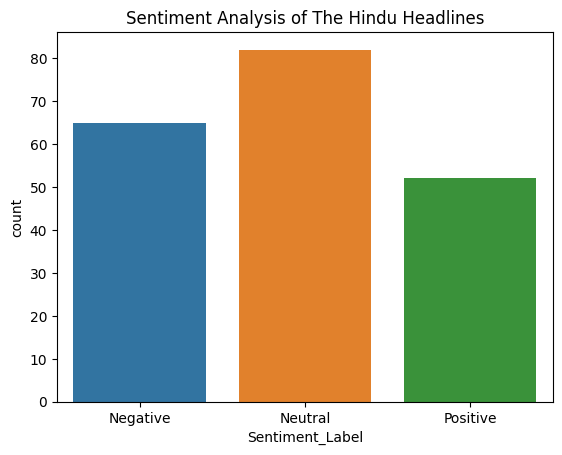

In [15]:
sns.countplot(x='Sentiment_Label', data=df)
plt.title('Sentiment Analysis of The Hindu Headlines')
plt.show()